In [2]:
import numpy as np
import xmlTranslator as xmlT
from ipywidgets import FloatProgress
from tqdm import tqdm
import importlib
from utils import get_project_root

TODO: 
- Repeat the sequences 3 times
- Extend all chords into the chromatic scale
- Complete the voicing as a MIDI array 
- Fix the style token
- Form a dataset of MIDI MPE

In [3]:
directory = '/dataset/iRealXML'
root = get_project_root()
myPath = str(root) + str(directory)

theChordDataset, theDurationsDataset, all_meta = xmlT.parse_info_from_XML(myPath)

  0%|          | 0/4005 [00:00<?, ?it/s]

(4005,) (4005,) (4005,)


In [4]:
def print_this_song(meta, dataset, id):
    print(meta[id])
    for i, e in enumerate(dataset[id]):
        print(i, e)
    print('')

In [5]:
#Correct the location of 'e||'
dataset = []
dataset_durations = []
for i, song in enumerate(theChordDataset):
    d = theDurationsDataset[i]
    song, durations = xmlT.correct_coda_end(song, d)
    dataset.append(song)
    dataset_durations.append(durations)
print(len(dataset), len(dataset_durations))

4005 4005


In [6]:
id = 204
print(all_meta[id])
print(len(dataset[id]))
print(dataset[id].tolist())

{'composer': 'Sting', 'style': "Even 8th's", 'song_name': 'All This Time', 'tonality': 'G major', 'midi_key': 19, 'time_signature': '4/4', 'decade': 'Null'}
254
['<style>', "Even 8th's", '|:', '.', '2.0', 'G', 'major', '.', '2.0', 'E', 'minor', '|', '.', '2.0', 'D', 'major', '.', '2.0', 'C', 'major', '|', '.', '2.0', 'G', 'major', '.', '2.0', 'E', 'minor', '|', '.', '2.0', 'D', 'major', '.', '2.0', 'C', 'major', ':|', 'Form_C', '|', 'Repeat_1', '.', '4.0', 'E', 'minor', '|', '.', '4.0', 'E', 'minor', '|', '.', '4.0', 'A', 'major', '|', '.', '4.0', 'C', 'major', '|', '.', '4.0', 'D', 'major', '|', '.', '4.0', 'D', 'major', 'Form_C', '|', 'Repeat_2', '.', '4.0', 'E', 'minor', '|', '.', '4.0', 'E', 'minor', '|', '.', '4.0', 'A', 'major', '|', '.', '4.0', 'C', 'major', '|', '.', '4.0', 'D', 'major', '|', '.', '4.0', 'D', 'major', '|', '.', '4.0', 'G', 'major', '|', '.', '4.0', 'G', 'major', '|', '.', '4.0', 'E', 'minor', '|', '.', '4.0', 'E', 'minor', '|', '.', '4.0', 'A', 'major', '|', '.

In [7]:
'''
This section expands the song following the rules of bar repetitions and coda endings
'''
importlib.reload(xmlT)

id = 4
expand_form_dataset = []
expand_duration_dataset = []
status = True
for i in tqdm(range(len(dataset))):
    song_structure, duration_structure, status = xmlT.expand_song_structure(dataset[i], dataset_durations[i], i, False)
    if status == False:
        print('Song:', all_meta[i])
        id = i
        break
    song_structure = np.array(song_structure)
    duration_structure = np.array(duration_structure)
    expand_form_dataset.append(song_structure)
    expand_duration_dataset.append(duration_structure)

#Check if the dataset is correct
for i in range(len(expand_form_dataset)):
    if len(expand_form_dataset[i]) != len(expand_duration_dataset[i]):
        print('Error in:', i)
        break

100%|██████████| 4005/4005 [00:00<00:00, 4870.89it/s]


In [8]:
id = 2503
test_this = dataset[id]
durations = dataset_durations[id]
print(test_this)

song, duration, status = xmlT.expand_song_structure(test_this, durations, id, True)

print(song)

['<style>' 'Medium Swing' 'Form_A' '|' '.' '4.0' 'G' 'major-sixth' '|' '.'
 '2.0' 'G' 'major-sixth' '.' '2.0' 'E' 'minor-seventh' '|' '.' '4.0' 'A'
 'dominant' '|' '.' '4.0' 'A' 'dominant' '|' '.' '2.0' 'A' 'minor-seventh'
 '.' '2.0' 'D' 'dominant' '|' '.' '2.0' 'A' 'minor-seventh' '.' '2.0' 'D'
 'dominant' '|' '.' '4.0' 'G' 'major-seventh' '|' '.' '4.0' 'G'
 'major-seventh' '|' '.' '4.0' 'G' 'major-seventh' '|' '.' '2.0' 'B'
 'minor-seventh' '.' '2.0' 'Bb' 'diminished-seventh' '|' '.' '4.0' 'A'
 'minor-seventh' '|' '.' '4.0' 'D' 'dominant' '|' '.' '2.0' 'E'
 'minor-seventh' '.' '2.0' 'A' 'dominant' '|' '.' '2.0' 'E'
 'minor-seventh' '.' '2.0' 'A' 'dominant' '|' '.' '4.0' 'A'
 'minor-seventh' '|' '.' '4.0' 'D' 'dominant' 'Form_B' '|' '.' '4.0' 'G'
 'major-sixth' '|' '.' '2.0' 'G' 'major-sixth' '.' '2.0' 'E'
 'minor-seventh' '|' '.' '4.0' 'A' 'dominant' '|' '.' '4.0' 'A' 'dominant'
 '|' '.' '2.0' 'A' 'minor-seventh' '.' '2.0' 'D' 'dominant' '|' '.' '2.0'
 'A' 'minor-seventh' '.' '2.0' '

In [9]:
#Replace the 'e||' with '|' and 'b||' with '|'
for i, song in enumerate(expand_form_dataset):
    for j, e in enumerate(song):
        if e == 'e||':
            expand_form_dataset[i][j] = '|'
        elif e == 'b||':
            expand_form_dataset[i][j] = '|'
            
print(len(dataset))

4005


In [10]:
sub_sections = dataset[4004:4005]
print(len(sub_sections))
sub_durations = dataset_durations[4004:4005]
for i in range(len(sub_sections)):
    a, b, s = xmlT.expand_song_structure(sub_sections[i], sub_durations[i], i, True)

print(a)

1
Song: 0 
Length of sequence: 248
Process completed successfully.. New form length: 328
-----------------------------

['<style>', 'Medium Up Swing', 'Form_A', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'D', 'minor-seventh', '|', '.', '4.0', 'G', 'dominant', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'D', 'minor-seventh', '|', '.', '4.0', 'G', 'dominant', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'C', 'major-sixth', '|', '.', '4.0', 'D', 'minor-seventh', '|', '.', '4.0', 'G', 'dominant', '|', '.', '4.0', 'C', 'major

In [11]:
'''
Unify chord and duration into a tuple as good friends
'''

# dataset = []
# for chords_values, durations_values in zip(expand_form_dataset, expand_duration_dataset):
#     coupled = list(zip(chords_values, durations_values))
#     dataset.append(coupled)    

'\nUnify chord and duration into a tuple as good friends\n'

In [12]:
#correct the wrong chords
importlib.reload(xmlT)

corrected_sequence = xmlT.replaceTheseChords(dataset, False)

  0%|          | 0/4005 [00:00<?, ?it/s]

In [13]:
#Add the maj token to those single notes that are not clarified.
import voicing as vc
voicing = vc.Voicing()
new_dataset = []
id = 256
#id = 2686
name = all_meta[id]['song_name']

print(name)

for x, song in enumerate(tqdm(corrected_sequence)):
    sequence = []
    for i, chord in enumerate(song):
        sequence.append(chord)
        #chord = item[0]
        #duration = item[1]
        next = ''
        if i < len(song) - 1:
            next = song[i + 1]
            previous = song[i - 1]
            if chord in voicing.all_notes and next != 'N.C.' and previous != '/' and (next in voicing.structural_elements or next.startswith('Form_')):
                sequence.append('maj')
                #print(x, 'Added Maj to:', chord, 'at position:', i)
        elif i == len(song) - 1:
            previous = song[i - 1]
            if chord in voicing.all_notes and previous != '/':
                sequence.append('maj')
                #print(x, 'Added Maj to:', chord, 'at position:', i)
    new_dataset.append(sequence)
    
print(len(new_dataset))
print(new_dataset[id])
# for e in new_dataset:
#     for a in e:
#         print(a)

One By One


100%|██████████| 4005/4005 [00:00<00:00, 12371.99it/s]

4005
['<style>', 'Medium Up Swing', 'Form_intro', '|:', '.', '4.0', 'Bb', 'maj7', '|', '.', '4.0', 'Bb', 'maj7', '|', '.', '4.0', 'Bb', 'maj7', '|', '.', '4.0', 'Bb', 'maj7', ':|', 'Form_A', '|:', '.', '2.0', 'A', 'm7', 'alter b5 add b13', '.', '2.0', 'D', 'dom7', 'alter b5 add b13', '|', '.', '4.0', 'G', 'm7', '|', '.', '2.0', 'C', 'm7', '.', '2.0', 'F', 'dom7', '|', '.', '4.0', 'Bb', 'maj7', '|', '.', '2.0', 'A', 'dom7', 'add #9', '.', '2.0', 'Ab', 'dom7', '|', '.', '2.0', 'G', 'm7', '.', '2.0', 'Bb', 'dom7', '/', 'F', '|', '.', '2.0', 'E', 'm7', 'alter b5 add b13', '.', '2.0', 'D', 'dom7', 'alter b5 add b13', '|', '.', '4.0', 'G', 'm7', ':|', 'Form_B', '|', '.', '2.0', 'E', 'dom7', 'add #9', '.', '2.0', 'A', 'dom7', 'add #9', '|', '.', '2.0', 'D', 'm7', '.', '2.0', 'B', 'm7', 'alter b5', '|', '.', '2.0', 'E', 'm7', 'alter b5 add b9', '.', '2.0', 'A', 'dom7', 'alter b5 add b9', '|', '.', '2.0', 'D', 'm7', '.', '2.0', 'Bb', 'dom7', '|', '.', '2.0', 'A', 'dom7', 'add #9', '.', '2.0', '

In [14]:
#clean the elements that are ''
dataset = [[tup for tup in inner_list if tup != ''] for inner_list in new_dataset]

print(len(dataset))
print(dataset[0])

for song in dataset:
    for i, e in enumerate(song):
        if e[0] == '':
            print(song)
            print(i)
            break

4005
['<style>', 'Samba', '|', '.', '4.0', 'D', 'm', '|', '.', '4.0', 'Bb', 'maj6', '|', '.', '2.0', 'B', 'o', '.', '2.0', 'A', 'dom7', '|', '.', '2.0', 'D', 'm', '.', '1.0', 'E', 'm7', 'alter b5', '.', '1.0', 'A', 'dom7', '|', '.', '4.0', 'D', 'm', '|', '.', '4.0', 'Bb', 'maj6', '|', '.', '2.0', 'E', 'dom7', 'add b9', '.', '2.0', 'A', 'dom7', '|', '.', '4.0', 'D', 'm', '|', '.', '2.0', 'D#', 'o', '.', '2.0', 'D', 'dom7', '|', '.', '4.0', 'G', 'm6', '|', '.', '4.0', 'C', 'dom7', '|', '.', '2.0', 'F', 'maj', '.', '2.0', 'A', 'dom7']


In [15]:
importlib.reload(xmlT)
'''
This section is important to define a more concise format and tokenization.
Fix the format of extensions to avoid repeated elements
'''

xmlT.fix_extensions(dataset)

  0%|          | 0/4005 [00:00<?, ?it/s]

In [16]:
#Check vocabulary
vocab = np.unique(np.concatenate(dataset))

print(len(vocab))
print(np.array(vocab))

222
['.' '/' '0.3997395833333333' '0.4440104166666667' '0.5' '0.5703125'
 '0.6666666666666666' '0.75' '0.7994791666666666' '0.8880208333333334'
 '1.0' '1.1419270833333333' '1.3333333333333333' '1.5'
 '1.5989583333333333' '1.7135416666666667' '128 Feel' '2.0' '2.25'
 '2.3997395833333335' '2.6666666666666665' '3.0' '4.0' ':|' '<style>' 'A'
 'A#' 'Ab' 'Afoxe' 'Afoxé' 'Afoxé-Samba' 'Afro' 'Afro-Samba' 'B' 'Baião'
 'Ballad' 'Bb' 'Beatles' 'Blues' 'Blues Pop' 'Blues Rock' 'Blues Shuffle'
 'Bolero' 'Bolero-Cha' 'Bolero-Son' 'Bossa Acoustic' 'Bossa Nova'
 'Bright Shuffle Blues' 'C' 'C#' 'Calypso' 'Cb' 'Cha Cha' 'Chacarera'
 'Choro' 'Choro - Samba' 'Country Ballad' 'Country Blues' 'Cuban Son' 'D'
 'D#' 'Db' 'Deliberately' 'Disco' 'Disco Funk' 'Dreamlike' 'E' 'Eb'
 'Electro Pop' 'Even 16ths' "Even 8's" "Even 8th's" 'Even 8ths' 'F' 'F#'
 'Fast Blues' 'Fast Swing' 'Folk' 'Folk Ballad' 'Folk Rock' 'Folk-Rock'
 'Form_A' 'Form_B' 'Form_C' 'Form_Coda' 'Form_D' 'Form_Segno' 'Form_intro'
 'Form_verse' '

In [17]:
'''
Find duplicated 'add' or 'alter' elements and remove them to clean the tokenization method
'''

def correctDuplicatedExtensions(sequence):
    structural_elements = {'.', '|', ':|', '|:', '/', 'N.C.'}

    for x, song in enumerate(tqdm(sequence)):
        for y, item in enumerate(song):
            #e = item[0]
            if '.' in item:
                search = True
                stepper = y + 2
                check_extensions = []
                while search:
                    if (stepper) >= len(song):
                        search = False
                        #print('End of song')
                        break
                    elif stepper < len(song) - 1:
                        element = song[stepper]
            
                    if element in structural_elements or element.startswith('Form_'):
                        search = False
                    else:
                        if element not in check_extensions:
                            check_extensions.append(element)
                        elif stepper < len(song)-1:
                            #print('Duplicated:', x, stepper, element, check_extensions)
                            song.pop(stepper)
                        stepper += 1
                if len(check_extensions) > 2:
                    continue
                    print(x, y+stepper, check_extensions)
                
correctDuplicatedExtensions(dataset)
id = 0
strings_array = [item[0] for item in dataset[id] if item[0] != '']
print(strings_array)

100%|██████████| 4005/4005 [00:00<00:00, 16409.56it/s]

['<', 'S', '|', '.', '4', 'D', 'm', '|', '.', '4', 'B', 'm', '|', '.', '2', 'B', 'o', '.', '2', 'A', 'd', '|', '.', '2', 'D', 'm', '.', '1', 'E', 'm', 'a', '.', '1', 'A', 'd', '|', '.', '4', 'D', 'm', '|', '.', '4', 'B', 'm', '|', '.', '2', 'E', 'd', 'a', '.', '2', 'A', 'd', '|', '.', '4', 'D', 'm', '|', '.', '2', 'D', 'o', '.', '2', 'D', 'd', '|', '.', '4', 'G', 'm', '|', '.', '4', 'C', 'd', '|', '.', '2', 'F', 'm', '.', '2', 'A', 'd']


In [18]:
'''
These sequences have some elements that are repeated and should be removed
In particular the error of double nature Dom7 and sus
If the code is run twice, no print should be shown
'''
import voicing as vc

def correctThis(sequence):
    fix_this = [{'seq': ['dom7', 'sus7', 'add b9'], 'remove': 'dom7'},
                {'seq': ['sus4', 'add 7', 'dom7'], 'remove': 'dom7'},
                {'seq': ['dom7', 'sus4', 'add b9'], 'remove': 'dom7'},
                {'seq': ['sus7', 'add 13', 'sus4'], 'remove': 'sus4'},
                {'seq': ['sus7', 'add 9', 'sus4'], 'remove': 'sus4'},
                {'seq': ['dom7', 'add 13', 'sus7'], 'remove': 'sus7'},
                {'seq': ['dom7', 'add 13', 'sus4'], 'remove': 'sus4'},
                {'seq': ['dom7', 'add 9', 'sus7'], 'remove': 'sus7'},
                {'seq': ['dom7', 'add 9', 'add #5', 'add b9'], 'remove': 'add 9'},
                {'seq': ['m', 'add 6', 'add 9', 'sus4'], 'remove': 'sus4'},
                {'seq': ['sus7', 'add 13', 'sus4', 'add b9'], 'remove': 'sus4'},
                {'seq': ['dom7', 'add 13', 'sus4', 'add b9'], 'remove': 'sus4'}]

    structural_elements = vc.Voicing().getStructuralElements()

    for x, song in enumerate(sequence):
        for y, e in enumerate(song):
            if '.' in e:
                search = True
                stepper = y + 2
                check_extensions = []
                while search:
                    if (stepper) >= len(song):
                        search = False
                        #print('End of song')
                        break
                    elif stepper < len(song) - 1:
                        element = song[stepper]
            
                    if element in structural_elements or element.startswith('Form_'):
                        search = False
                    else:
                        if element not in check_extensions:
                            check_extensions.append(element)
                        for item in fix_this:
                            if check_extensions == item['seq']:
                                print(x, stepper, check_extensions, 'to remove:', item['remove'])
                                #find the location of the element in the array
                                for i in range(len(check_extensions)):
                                    if check_extensions[i] == item['remove']:
                                        location = i + stepper - 2
                                        #erase this element from song
                                        if location < len(song):
                                            print(location, item['remove'], song[location])
                                            song.pop(location)
                                        break
                                
                        stepper += 1

#this has to be run three times to clean the dataset
for i in range(4):
    correctThis(dataset)


1 97 ['dom7', 'add 13', 'sus4'] to remove: sus4
97 sus4 sus4
1 103 ['dom7', 'sus4', 'add b9'] to remove: dom7
101 dom7 dom7
49 148 ['dom7', 'add 13', 'sus7'] to remove: sus7
148 sus7 sus7
49 370 ['dom7', 'add 13', 'sus7'] to remove: sus7
370 sus7 sus7
49 429 ['dom7', 'add 13', 'sus7'] to remove: sus7
429 sus7 sus7
78 333 ['dom7', 'sus7', 'add b9'] to remove: dom7
331 dom7 dom7
78 341 ['dom7', 'sus7', 'add b9'] to remove: dom7
339 dom7 dom7
78 348 ['dom7', 'sus7', 'add b9'] to remove: dom7
346 dom7 dom7
194 162 ['dom7', 'add 9', 'sus7'] to remove: sus7
162 sus7 sus7
194 168 ['dom7', 'sus7', 'add b9'] to remove: dom7
166 dom7 dom7
211 184 ['dom7', 'sus7', 'add b9'] to remove: dom7
182 dom7 dom7
215 39 ['dom7', 'sus7', 'add b9'] to remove: dom7
37 dom7 dom7
215 172 ['dom7', 'add 13', 'sus7'] to remove: sus7
172 sus7 sus7
215 178 ['dom7', 'add 13', 'sus7'] to remove: sus7
178 sus7 sus7
215 321 ['dom7', 'add 9', 'sus7'] to remove: sus7
321 sus7 sus7
319 29 ['dom7', 'sus7', 'add b9'] to remo

In [19]:
'''
Correct duplicated natures using Dom7 and suspended
'''

for x, song in enumerate(dataset):
    for y, info in enumerate(song):
        
        if info == '.' and y < len(song) - 1:
            z = y + 1
            next = song[z][0]
            
            found_dom = False
            found_sus = False
            seq = []
            while z < len(song) - 1 and next != '.':
                if 'dom7' in next:
                    dom = (next, z)
                    seq.append(dom)
                    found_dom = True
                if next.startswith('sus'):
                    found_sus = True
                    sus = (next, z)
                    seq.append(sus)
                if found_dom and found_sus:
                    print("Corrected at:", x, y, seq)
                    duration = song[y][1]
                    corrected = ('sus7', duration)
                    c_id = seq[0][1]
                    song[c_id] = corrected
                    delete_id = seq[1][1]
                    song.pop(delete_id)
                    #closeThis = True
                    break
                z += 1
                next = song[z][0]
                
                

In [20]:
'''
Correct duplicated natures 
'''

import voicing as vc
voicing = vc.Voicing()

for x, song in enumerate(dataset):
    for y, info in enumerate(song):
        if info == '.' and y < len(song) - 1:
            z = y + 1
            next = song[z][0]
            seq = []
            while z < len(song) - 1 and next != '.':
                if next in voicing.natures:
                    nat = (next, z)
                    seq.append(nat)
                    found_dom = True
                if len(seq) > 1:
                    print("Corrected at:", x, y, seq)
                    delete_id = seq[1][1]
                    song.pop(delete_id)
                    break
                z += 1
                next = song[z][0]

In [21]:
id = 5
print(all_meta[id])

{'composer': 'Hal Hopper', 'style': 'Ballad', 'song_name': "There's No You", 'tonality': 'F major', 'midi_key': 17, 'time_signature': '4/4', 'decade': 'Null'}


In [22]:
#Check the length of the song

max_length = {'v': 0, 'id': 0}
min_length = {'v': 1000, 'id': 0}

for i in range(len(dataset)):
    if len(dataset[i]) > max_length['v']:
        max_length['v'] = len(dataset[i])
        max_length['id'] = i
    if len(dataset[i]) < min_length['v']:
        min_length['v'] = len(dataset[i])
        min_length['id'] = i

print('Max:', max_length, 'Min:', min_length)

Max: {'v': 908, 'id': 2824} Min: {'v': 23, 'id': 2365}


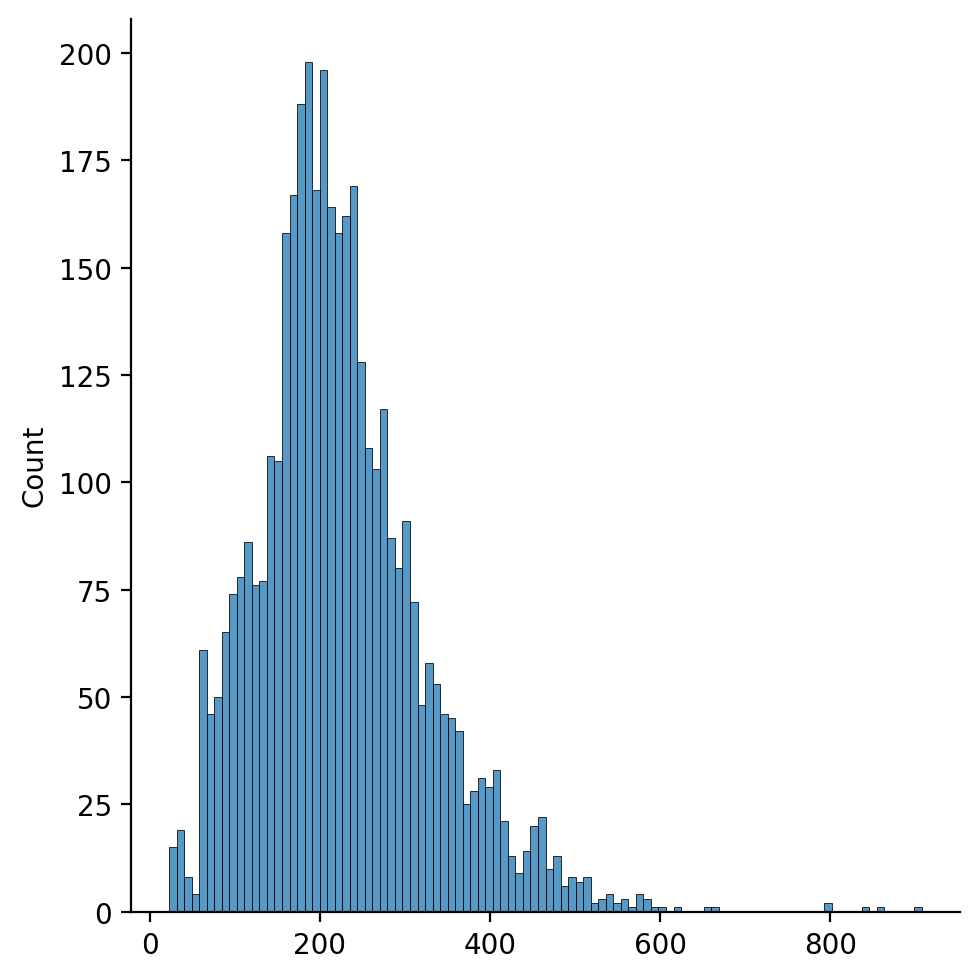

In [23]:
import seaborn as sns

#visualize the length of the songs

length = []
for song in dataset:
    length.append(len(song))
    
sns.displot(length, kde=False, bins=100)

In [24]:
import voicing as vc
voicing = vc.Voicing()


id = 999999
for i, data in enumerate(all_meta):
    if 'Giant Steps' in data['song_name']:
        id = i
        print(i)
        break




3371


In [25]:
import voicing as vc

#check the voicing conversion of all chords
from_ = id
to_ = id+1
myTracks = dataset[from_:to_]
sub_names = []
for names in all_meta[from_:to_]:
    sub_names.append(names['song_name'])
voicing = vc.Voicing()
midi_voicing = []


i = 0
for item in tqdm(myTracks):
    mv, status = voicing.convert_chords_to_voicing(item)
    midi_voicing.append(mv)
    if status == False:
        print(i, '\n', all_meta[i], '\n', item)
        break
    i += 1
print(len(midi_voicing))
print(sub_names)


100%|██████████| 1/1 [00:00<00:00, 6710.89it/s]

1
['Giant Steps']


In [26]:
id = 2503
print_this_song(all_meta, dataset, id)

{'composer': 'Isham Jones', 'style': 'Medium Swing', 'song_name': 'The One I Love (Belongs To Somebody Else)', 'tonality': 'G major', 'midi_key': 19, 'time_signature': '4/4', 'decade': 'Null'}
0 <style>
1 Medium Swing
2 Form_A
3 |
4 .
5 4.0
6 G
7 maj6
8 |
9 .
10 2.0
11 G
12 maj6
13 .
14 2.0
15 E
16 m7
17 |
18 .
19 4.0
20 A
21 dom7
22 |
23 .
24 4.0
25 A
26 dom7
27 |
28 .
29 2.0
30 A
31 m7
32 .
33 2.0
34 D
35 dom7
36 |
37 .
38 2.0
39 A
40 m7
41 .
42 2.0
43 D
44 dom7
45 |
46 .
47 4.0
48 G
49 maj7
50 |
51 .
52 4.0
53 G
54 maj7
55 |
56 .
57 4.0
58 G
59 maj7
60 |
61 .
62 2.0
63 B
64 m7
65 .
66 2.0
67 Bb
68 o7
69 |
70 .
71 4.0
72 A
73 m7
74 |
75 .
76 4.0
77 D
78 dom7
79 |
80 .
81 2.0
82 E
83 m7
84 .
85 2.0
86 A
87 dom7
88 |
89 .
90 2.0
91 E
92 m7
93 .
94 2.0
95 A
96 dom7
97 |
98 .
99 4.0
100 A
101 m7
102 |
103 .
104 4.0
105 D
106 dom7
107 Form_B
108 |
109 .
110 4.0
111 G
112 maj6
113 |
114 .
115 2.0
116 G
117 maj6
118 .
119 2.0
120 E
121 m7
122 |
123 .
124 4.0
125 A
126 dom7
127 |
128 .
129 4

In [27]:
''' 
Extend the form of the song to complete at least 64 bars
'''

bars = []
for song in dataset:
    number_of_bars = 0
    for i, e in enumerate(song):
        if e == '|' or e == 'e||' or e == 'b||':
            number_of_bars += 1
    bars.append(number_of_bars)
    
print(len(bars))
print(bars)

repeat_times = 3
minimum = 64
new_dataset = []
for i, song in enumerate(dataset):
    new_song = []
    if bars[i] < minimum:
        #repeat the song again
        intro = song[0:2]
        s = song[2:]
        new_song = intro
        for i in range(repeat_times):
            new_song+=s
    
        new_dataset.append(new_song)
    else:
        new_dataset.append(song)

   

4005
[12, 21, 16, 37, 36, 25, 40, 34, 10, 12, 24, 35, 68, 38, 48, 53, 47, 38, 28, 30, 60, 32, 33, 25, 39, 44, 64, 30, 31, 26, 39, 46, 32, 16, 35, 42, 27, 42, 24, 25, 43, 25, 32, 29, 25, 36, 26, 33, 7, 55, 47, 23, 16, 31, 12, 23, 48, 32, 46, 12, 32, 46, 40, 25, 25, 25, 43, 40, 29, 20, 23, 43, 12, 24, 20, 41, 32, 32, 43, 3, 26, 40, 12, 23, 21, 32, 12, 17, 46, 12, 37, 32, 24, 40, 28, 20, 68, 44, 36, 32, 27, 20, 30, 29, 47, 29, 16, 28, 32, 32, 29, 27, 12, 37, 32, 17, 34, 24, 14, 52, 23, 32, 29, 39, 41, 26, 28, 35, 26, 32, 49, 14, 32, 62, 23, 16, 20, 25, 25, 33, 26, 14, 32, 79, 12, 33, 24, 41, 36, 32, 26, 32, 35, 13, 41, 36, 44, 17, 32, 25, 31, 25, 34, 32, 27, 25, 32, 24, 39, 25, 11, 23, 32, 37, 35, 39, 34, 32, 37, 36, 12, 30, 36, 35, 40, 35, 25, 12, 24, 29, 25, 34, 26, 50, 33, 43, 23, 24, 59, 40, 37, 23, 26, 12, 41, 50, 35, 12, 32, 16, 22, 45, 15, 30, 55, 34, 24, 25, 38, 31, 36, 25, 30, 21, 52, 32, 21, 32, 25, 10, 16, 13, 32, 19, 32, 44, 21, 21, 32, 32, 35, 25, 10, 47, 32, 47, 32, 29, 25, 

4005
[36, 72, 51, 111, 108, 78, 120, 105, 36, 36, 75, 105, 68, 141, 144, 159, 138, 114, 84, 90, 186, 93, 105, 78, 120, 135, 64, 93, 96, 75, 114, 147, 96, 48, 108, 129, 81, 129, 75, 78, 129, 78, 96, 108, 78, 111, 87, 105, 24, 171, 144, 72, 48, 96, 39, 72, 141, 96, 141, 33, 96, 141, 126, 78, 78, 78, 132, 120, 93, 60, 72, 132, 39, 75, 60, 126, 96, 96, 141, 12, 84, 117, 36, 72, 66, 96, 36, 54, 141, 39, 108, 96, 72, 120, 87, 63, 68, 141, 114, 96, 84, 60, 96, 90, 141, 90, 51, 84, 96, 99, 90, 90, 36, 108, 96, 54, 105, 75, 48, 153, 72, 96, 90, 114, 126, 75, 84, 102, 75, 96, 141, 48, 96, 186, 72, 51, 60, 78, 78, 102, 81, 48, 96, 81, 36, 102, 75, 135, 114, 93, 78, 96, 108, 36, 117, 123, 132, 54, 93, 78, 99, 78, 105, 96, 84, 78, 93, 75, 114, 78, 36, 72, 96, 120, 114, 114, 102, 99, 114, 108, 36, 87, 105, 108, 126, 111, 78, 36, 75, 90, 78, 99, 78, 159, 102, 132, 72, 72, 177, 120, 111, 69, 87, 36, 126, 156, 108, 36, 96, 48, 69, 138, 48, 90, 168, 96, 72, 78, 111, 96, 105, 78, 90, 69, 177, 96, 66, 96,

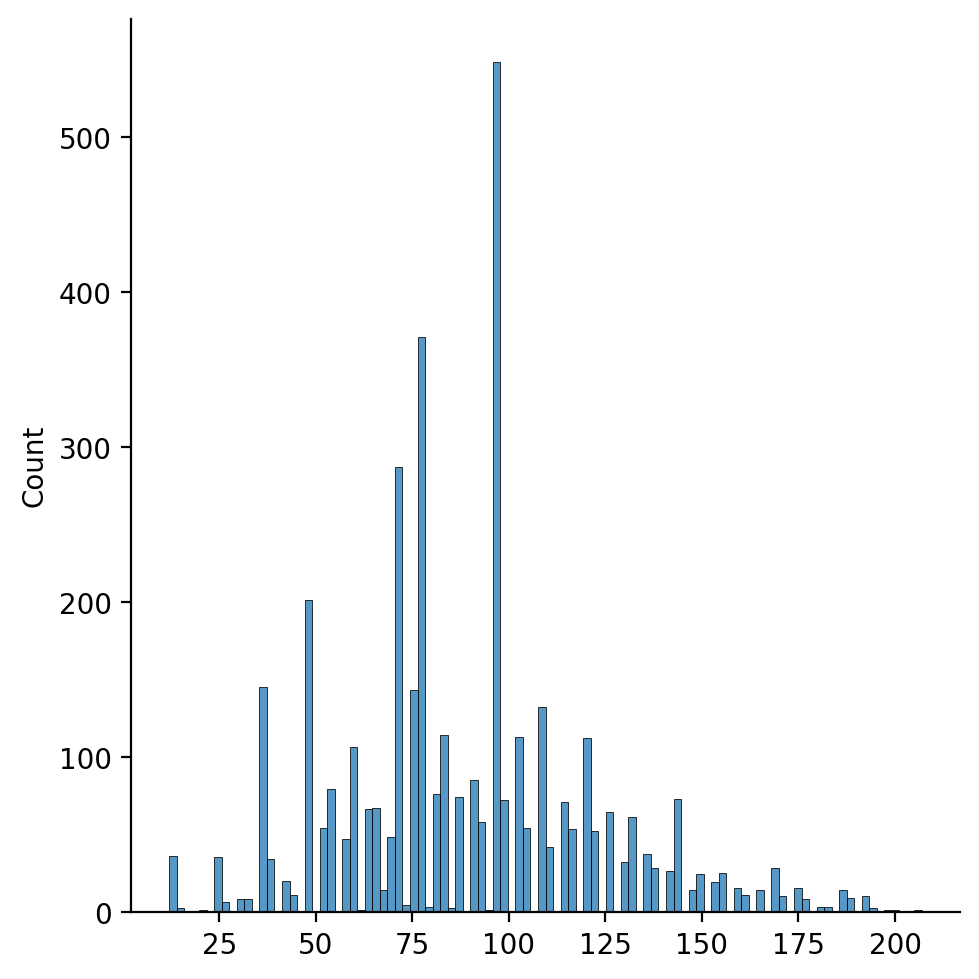

In [28]:
bars = []
for song in new_dataset:
    number_of_bars = 0
    for i, e in enumerate(song):
        if e[0] == '|' or e[0] == 'e||' or e[0] == 'b||':
            number_of_bars += 1
    bars.append(number_of_bars)
    
print(len(bars))
print(bars)

import seaborn as sns

#visualize the bars length of the songs
sns.displot(bars, kde=False, bins=100)

In [29]:
#check all tonalities
all_tonalities = [all_meta[i]['tonality'] for i in range(len(all_meta))]

all_tonalities = set(all_tonalities)
print(all_tonalities)

#get only the notes by splitting the tonalities
tonalities = [t.split(' ')[0] for t in all_tonalities]

#sort notes starting from A
tonalities = set(tonalities)
notes = sorted(tonalities, key=lambda x: (x, x[0]))
print(notes)


{'F major', 'G major', 'A minor', 'F# minor', 'A major', 'Bb minor', 'C minor', 'G# minor', 'Gb major', 'Eb major', 'D minor', 'E major', 'E minor', 'B minor', 'Eb minor', 'C# minor', 'Ab major', 'F minor', 'Bb major', 'D major', 'G minor', 'Db major', 'C major', 'B major'}
['A', 'Ab', 'B', 'Bb', 'C', 'C#', 'D', 'Db', 'E', 'Eb', 'F', 'F#', 'G', 'G#', 'Gb']


In [30]:
#Check songs after transposing test case

import transposition as tr
importlib.reload(tr)

transpose = tr.Transposition()

#id = 1474
#id = 4005
id = 256
song_to_transpose = new_dataset[id]
tonality = all_meta[id]['tonality']
song_name = all_meta[id]['song_name']

tonal = 'C'
new_song = transpose.transpose_song(song_to_transpose, tonality, tonal)

print(len(song_to_transpose), len(new_song))
print(song_to_transpose)
print(new_song)

752 752
['<style>', 'Medium Up Swing', 'Form_intro', '|:', '.', '4.0', 'Bb', 'maj7', '|', '.', '4.0', 'Bb', 'maj7', '|', '.', '4.0', 'Bb', 'maj7', '|', '.', '4.0', 'Bb', 'maj7', ':|', 'Form_A', '|:', '.', '2.0', 'A', 'm7', 'alter b5', 'add b13', '.', '2.0', 'D', 'dom7', 'alter b5', 'add b13', '|', '.', '4.0', 'G', 'm7', '|', '.', '2.0', 'C', 'm7', '.', '2.0', 'F', 'dom7', '|', '.', '4.0', 'Bb', 'maj7', '|', '.', '2.0', 'A', 'dom7', 'add #9', '.', '2.0', 'Ab', 'dom7', '|', '.', '2.0', 'G', 'm7', '.', '2.0', 'Bb', 'dom7', '/', 'F', '|', '.', '2.0', 'E', 'm7', 'alter b5', 'add b13', '.', '2.0', 'D', 'dom7', 'alter b5', 'add b13', '|', '.', '4.0', 'G', 'm7', ':|', 'Form_B', '|', '.', '2.0', 'E', 'dom7', 'add #9', '.', '2.0', 'A', 'dom7', 'add #9', '|', '.', '2.0', 'D', 'm7', '.', '2.0', 'B', 'm7', 'alter b5', '|', '.', '2.0', 'E', 'm7', 'alter b5', 'add b9', '.', '2.0', 'A', 'dom7', 'alter b5', 'add b9', '|', '.', '2.0', 'D', 'm7', '.', '2.0', 'Bb', 'dom7', '|', '.', '2.0', 'A', 'dom7', 'a

In [31]:
#Augment the dataset with all tonalities
import transposition as tr
transpose = tr.Transposition()

dataset_augmented = []
meta_augmented = []
tonalities = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

for i, song in enumerate(tqdm(new_dataset)):
    tonality = all_meta[i]['tonality']
    for tonal in tonalities:
        new_song = transpose.transpose_song(song, tonality, tonal)
        dataset_augmented.append(new_song)
        new_meta = all_meta[i].copy()
        info = tonality.split(' ')
        new_nature = info[1]
        new_meta['tonality'] = tonal + ' ' + new_nature
        meta_augmented.append(new_meta)

print(len(dataset_augmented), len(meta_augmented))

100%|██████████| 4005/4005 [00:31<00:00, 126.91it/s]

48060 48060


In [32]:
#Extract all MIDI arrays from the dataset, check the sizes and normalize its size to eight values
import voicing as vc
importlib.reload(vc)
voicing = vc.Voicing()

midi_voicing_dataset = []
for i, song in enumerate(tqdm(dataset_augmented)):
    mv, status = voicing.convert_chords_to_voicing(song)
    midi_voicing_dataset.append(mv)
    if status == False:
        print(i, '\n', meta_augmented[i], '\n', song)
        break
    
print(len(midi_voicing_dataset))


100%|██████████| 48060/48060 [01:07<00:00, 715.37it/s] 

48060


In [33]:
id = 3732
correct = True
for n, song in enumerate(tqdm(midi_voicing_dataset)):
    for i, e in enumerate(song):
        m = e[0]
        if len(m) != 8:
            print("\nWrong sequence at: ------> ", n, i, '\n', e, len(m), '\n')
            id = n
            print_this_song(meta_augmented, midi_voicing_dataset, id)
            correct = False
            break
    if correct == False:
        break
        
if (correct): print('Test Completed Successfully!!!')

100%|██████████| 48060/48060 [00:05<00:00, 8431.75it/s]

Test Completed Successfully!!!


In [34]:
id = 22872
print(meta_augmented[id])
print(dataset_augmented[id])
print(midi_voicing_dataset[id])

for i, chord in enumerate(dataset_augmented[id]):
    midi = midi_voicing_dataset[id][i][0]
    #print(i, chord, midi)

{'composer': 'Rick Wright (Pink Floyd)', 'style': 'Rock', 'song_name': 'Remember A Day', 'tonality': 'C major', 'midi_key': 16, 'time_signature': '4/4', 'decade': 'Null'}
['<style>', 'Rock', '|:', '.', '2.0', 'C', 'power', '.', '2.0', 'C', 'power', '/', 'D', '|', '.', '2.0', 'C', 'power', '/', 'Eb', '.', '2.0', 'C', 'power', '/', 'F', ':|', '|:', '.', '2.0', 'C', 'm', '.', '2.0', 'G', 'sus4', 'add 7', '/', 'C', '|', '.', '2.0', 'C', 'm', '.', '2.0', 'G', 'dom7', 'add 9', '/', 'C', ':|', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', 'Form_Segno', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'G', 'm', '/', 'C', '|', '.', '4.0', 'F', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'C', 'maj', 'Form_A', '|', '.', '4.0', 'C', 'maj', '|', '.', '4.0', 'G', 'm', '/', 'C', '|', '.', '4.0', 'F', 'maj', '|', '.', '2.0', 'C', 'm', '.', '2.0', 'G', 'sus4', 'add 7', '

In [35]:
#Save the files
import json
import os

#if formatted folder do not exist create it
if not os.path.exists('../dataset/formatted'):
    os.makedirs('../dataset/formatted')

with open('../dataset/formatted/meta_dataset.txt', 'w') as jsonFile:
    json.dump(meta_augmented, jsonFile)
    
with open('../dataset/formatted/dataset_augmented.txt', 'w') as jsonFile:
    json.dump(dataset_augmented, jsonFile)
    
with open('../dataset/formatted/midi_voicing_dataset.txt', 'w') as jsonFile:
    json.dump(midi_voicing_dataset, jsonFile)

## MIDI Dataset Formation with MPE Support

MPE (MIDI Polyphonic Expression) is essential for microtonal music:
- Each note gets its own MIDI channel (2-16)
- Independent pitch bend per note (up to ±48 semitones)
- Allows microtonal variations without interference

This section exports the dataset as MPE-formatted MIDI files.

In [36]:
# Check if voicing module has MPE export capability
import voicing as vc
import inspect

voicing = vc.Voicing()

# Check available methods in voicing class
print("Available methods in Voicing class:")
methods = [method for method in dir(voicing) if not method.startswith('_')]
for method in methods:
    print(f"  - {method}")

# Check if export_to_midi exists
if hasattr(voicing, 'export_to_midi'):
    print("\n✓ export_to_midi method exists")
    # Get method signature
    sig = inspect.signature(voicing.export_to_midi)
    print(f"  Signature: {sig}")
else:
    print("\n✗ export_to_midi method not found - needs to be created")

Available methods in Voicing class:
  - MidiChord
  - add_extensions_for_quality
  - add_maj_token
  - after_chords
  - all_notes
  - alter
  - aug
  - chord_voicing
  - convertChordsFromOutput
  - convert_chords_to_voicing
  - create_pitch_bend
  - dom7
  - durations
  - export_to_midi
  - getStructuralElements
  - get_chords
  - get_drop_2_voicing
  - get_drop_3_voicing
  - get_midi
  - listToIgnore
  - m
  - m6
  - m7
  - m_maj7
  - maj
  - maj6
  - maj7
  - natures
  - noChord
  - o
  - o7
  - o_maj7
  - optimize_voice_leading
  - play_midi
  - power
  - select_voicing_by_position
  - structural_elements
  - sus
  - sus2
  - sus4
  - sus7
  - voicing
  - ø7

✓ export_to_midi method exists
  Signature: (sequence, filename, path='../dataset/midi_files/')


In [37]:
# Create directory structure for MIDI dataset
import os

base_midi_path = '../dataset/midi_files'
mpe_midi_path = '../dataset/midi_files/mpe'

# Create directories if they don't exist
for path in [base_midi_path, mpe_midi_path]:
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"✓ Created directory: {path}")
    else:
        print(f"✓ Directory exists: {path}")

✓ Directory exists: ../dataset/midi_files
✓ Directory exists: ../dataset/midi_files/mpe


### MPE MIDI Export Function

MPE Configuration:
- Channel 1: Master channel (global messages)
- Channels 2-16: Note channels (15 voices of polyphony)
- Pitch bend range: ±48 semitones (for microtonal support)
- Each note assigned to a unique channel for independent pitch bend

In [38]:
from midiutil import MIDIFile
import numpy as np

class MPE_MIDI_Exporter:
    """
    Export MIDI files with MPE (MIDI Polyphonic Expression) support.
    MPE allows independent pitch bend per note, essential for microtonal music.
    """
    
    def __init__(self, num_channels=15, pitch_bend_range=48):
        """
        Initialize MPE MIDI Exporter
        
        Args:
            num_channels: Number of note channels (2-16), channel 1 is master
            pitch_bend_range: Pitch bend range in semitones (default ±48 for microtonal)
        """
        self.num_channels = num_channels
        self.pitch_bend_range = pitch_bend_range
        self.master_channel = 0  # Channel 1 (0-indexed)
        self.note_channels = list(range(1, num_channels + 1))  # Channels 2-16
        self.current_channel_idx = 0
        
    def get_next_channel(self):
        """Round-robin channel allocation for polyphony"""
        channel = self.note_channels[self.current_channel_idx]
        self.current_channel_idx = (self.current_channel_idx + 1) % len(self.note_channels)
        return channel
    
    def setup_mpe_channels(self, midi_file):
        """
        Configure MPE channels with proper settings
        - Set pitch bend range for all channels
        - Configure master channel
        """
        # Set pitch bend range on master channel (RPN MSB/LSB for pitch bend sensitivity)
        for channel in [self.master_channel] + self.note_channels:
            # RPN for pitch bend sensitivity
            midi_file.makeRPNCall(track=0, channel=channel, time=0, 
                                 controller_msb=0, controller_lsb=0, 
                                 data_msb=self.pitch_bend_range, data_lsb=0)
    
    def export_to_mpe_midi(self, midi_voicing_data, filename, output_path='./'):
        """
        Export MIDI voicing data to MPE-formatted MIDI file
        
        Args:
            midi_voicing_data: List of 3-tuples [(midi_notes_array, duration, chord_name), ...]
            filename: Output filename
            output_path: Directory to save file
        """
        # Create MIDI file with 1 track
        midi = MIDIFile(1, adjust_origin=False)
        track = 0
        tempo = 120
        
        midi.addTempo(track, 0, tempo)
        
        # Setup MPE channels
        self.setup_mpe_channels(midi)
        
        # Process sequence to extract actual chord events (following dot logic from voicing.py)
        midi_capture = []
        structural_elements = {'.', '|', ':|', '|:', '/', 'N.C.', '<end>'}
        
        for i, element in enumerate(midi_voicing_data):
            chord_name = element[2]
            
            # Dots indicate chord positions - look ahead to find the complete chord
            if chord_name == '.' and i < len(midi_voicing_data) - 2:
                ref = i
                counter = 0
                doIt = True
                
                # Look ahead to find the actual chord (skip duration tokens, etc.)
                while doIt and ref < len(midi_voicing_data) - 1:
                    counter += 1
                    ref += 1
                    next_chord = midi_voicing_data[ref][2]
                    
                    # Stop when hitting structural elements or form markers
                    if next_chord in structural_elements or next_chord.startswith('Form_'):
                        doIt = False
                        counter -= 1
                
                # Found the complete chord - use its MIDI data with the dot's duration
                if counter > 0:
                    chord_midi = midi_voicing_data[i + counter][0]
                    chord_duration = element[1]  # Use dot's duration
                    
                    # Filter out N.C. chords and empty MIDI
                    if chord_midi != [0, 0, 0, 0, 0, 0, 0, 0] and chord_midi != [48, 48, 48, 48, 0, 0, 0, 0]:
                        midi_capture.append((chord_midi, chord_duration))
        
        # Export captured chords to MPE MIDI
        current_time = 0.0
        
        for midi_notes, duration in midi_capture:
            # Filter out zero values (rests/structural elements)
            active_notes = [note for note in midi_notes if note > 0]
            
            if len(active_notes) > 0:
                # Add each note to a separate MPE channel
                for note in active_notes:
                    channel = self.get_next_channel()
                    velocity = 100
                    
                    # Add note on MPE channel
                    midi.addNote(track=track, 
                               channel=channel, 
                               pitch=int(note), 
                               time=current_time, 
                               duration=duration, 
                               volume=velocity)
            
            # Advance time
            current_time += duration
        
        # Write MIDI file
        full_path = f"{output_path}/{filename}.mid"
        with open(full_path, 'wb') as output_file:
            midi.writeFile(output_file)
        
        return full_path

# Create exporter instance
mpe_exporter = MPE_MIDI_Exporter(num_channels=15, pitch_bend_range=48)
print("✓ MPE MIDI Exporter initialized")
print(f"  - Note channels: {mpe_exporter.note_channels}")
print(f"  - Pitch bend range: ±{mpe_exporter.pitch_bend_range} semitones")

✓ MPE MIDI Exporter initialized
  - Note channels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  - Pitch bend range: ±48 semitones


In [39]:
# Test MPE export with a single song
test_id = 0
test_song = midi_voicing_dataset[test_id]
test_name = meta_augmented[test_id]['song_name']
test_tonality = meta_augmented[test_id]['tonality']

# Clean filename (remove special characters) - ID-based format for consistency
clean_name = "".join(c for c in test_name if c.isalnum() or c in (' ', '-', '_')).strip()
filename = f"{test_id:05d}_{clean_name}_{test_tonality.replace(' ', '_')}"

print(f"Exporting: {test_name} ({test_tonality})")
print(f"Filename: {filename}.mid")

# Export to MPE MIDI
output_path = mpe_exporter.export_to_mpe_midi(
    test_song, 
    filename, 
    mpe_midi_path
)

print(f"\n✓ MPE MIDI exported to: {output_path}")
print(f"  Song length: {len(test_song)} events")
print(f"  Total notes: {sum(len([n for n in event[0] if n > 0]) for event in test_song)}")

Exporting: Preciso Me Encontrar (C minor)
Filename: 00000_Preciso Me Encontrar_C_minor.mid

✓ MPE MIDI exported to: ../dataset/midi_files/mpe/00000_Preciso Me Encontrar_C_minor.mid
  Song length: 260 events
  Total notes: 346


In [40]:
# Export entire dataset to MPE MIDI files
print(f"Exporting {len(midi_voicing_dataset)} songs to MPE MIDI format...")
print(f"This will take a few minutes...\n")

export_count = 0
error_count = 0
errors = []

for i in tqdm(range(len(midi_voicing_dataset))):
    try:
        song = midi_voicing_dataset[i]
        name = meta_augmented[i]['song_name']
        tonality = meta_augmented[i]['tonality']
        
        # Clean filename
        clean_name = "".join(c for c in name if c.isalnum() or c in (' ', '-', '_')).strip()
        filename = f"{i:05d}_{clean_name}_{tonality.replace(' ', '_')}"
        
        # Export to MPE MIDI
        mpe_exporter.export_to_mpe_midi(song, filename, mpe_midi_path)
        export_count += 1
        
    except Exception as e:
        error_count += 1
        errors.append((i, name, str(e)))

print(f"\n✓ Export complete!")
print(f"  Successfully exported: {export_count} files")
print(f"  Errors: {error_count}")

if error_count > 0:
    print("\nErrors encountered:")
    for idx, name, error in errors[:10]:  # Show first 10 errors
        print(f"  [{idx}] {name}: {error}")

Exporting 48060 songs to MPE MIDI format...
This will take a few minutes...



100%|██████████| 48060/48060 [05:17<00:00, 151.18it/s] 


✓ Export complete!
  Successfully exported: 48060 files
  Errors: 0


In [41]:
# Verify MIDI file integrity by parsing it back
try:
    import pretty_midi
    has_pretty_midi = True
except:
    has_pretty_midi = False
    print("Installing pretty_midi for MIDI verification...")

if not has_pretty_midi:
    import subprocess
    subprocess.check_call(['pip', 'install', 'pretty_midi'])
    import pretty_midi

# Load and inspect the first exported MIDI file
midi_file_path = '../dataset/midi_files/mpe/00000_Preciso Me Encontrar_C_minor.mid'
midi_data = pretty_midi.PrettyMIDI(midi_file_path)

print(f"MIDI File: {midi_file_path}")
print(f"Duration: {midi_data.get_end_time():.2f} seconds")
print(f"Number of instruments: {len(midi_data.instruments)}")

# Check all instruments (MPE uses multiple channels as separate instruments)
print(f"\nInstruments (MPE channels):")
total_notes = 0
for i, inst in enumerate(midi_data.instruments):
    total_notes += len(inst.notes)
    print(f"  Channel {i+1}: {len(inst.notes)} notes")

print(f"\nTotal notes across all channels: {total_notes}")
print(f"\nFirst 20 notes across all channels:")
print(f"{'Note':<8} {'Pitch (MIDI#)':<15} {'Start':<10} {'End':<10} {'Duration':<10}")
print("-" * 65)

# Collect all notes from all instruments
all_notes = []
for inst in midi_data.instruments:
    all_notes.extend(inst.notes)
all_notes = sorted(all_notes, key=lambda n: n.start)

for i, note in enumerate(all_notes[:20]):
    note_name = pretty_midi.note_number_to_name(note.pitch)
    print(f"{note_name:<8} {note.pitch:<15} {note.start:<10.2f} {note.end:<10.2f} {note.end - note.start:<10.2f}")
    
print("\nSample chord voicings (grouped by start time):")
# Group notes by start time to show chords
from itertools import groupby
for start_time, chord_notes in groupby(all_notes[:50], key=lambda n: round(n.start, 1)):
    chord_list = list(chord_notes)
    if len(chord_list) >= 2:
        pitches = [pretty_midi.note_number_to_name(n.pitch) for n in chord_list]
        midi_nums = [n.pitch for n in chord_list]
        print(f"  Time {start_time:.1f}s: {pitches} (MIDI: {midi_nums})")


MIDI File: ../dataset/midi_files/mpe/00000_Preciso Me Encontrar_C_minor.mid
Duration: 72.00 seconds
Number of instruments: 15

Instruments (MPE channels):
  Channel 1: 18 notes
  Channel 2: 18 notes
  Channel 3: 18 notes
  Channel 4: 18 notes
  Channel 5: 18 notes
  Channel 6: 18 notes
  Channel 7: 18 notes
  Channel 8: 18 notes
  Channel 9: 17 notes
  Channel 10: 17 notes
  Channel 11: 17 notes
  Channel 12: 17 notes
  Channel 13: 17 notes
  Channel 14: 17 notes
  Channel 15: 17 notes

Total notes across all channels: 263

First 20 notes across all channels:
Note     Pitch (MIDI#)   Start      End        Duration  
-----------------------------------------------------------------
C3       48              0.00       2.00       2.00      
G3       55              0.00       2.00       2.00      
C4       60              0.00       2.00       2.00      
D4       62              0.00       2.00       2.00      
D#4      63              0.00       2.00       2.00      
G4       67         

## Validation: Compare Original XML vs Generated MIDI

Check if our conversion pipeline preserves chord accuracy by comparing:
1. Original iReal XML chord symbols
2. Tokenized sequence
3. MIDI voicing output

This will catch errors introduced during parsing, transposition, or voicing conversion.

In [42]:
# Validation system: Compare original XML chords with our pipeline output
import xml.etree.ElementTree as ET
import os
from collections import defaultdict

def extract_chords_from_musicxml(xml_file_path):
    """
    Extract chord symbols from MusicXML format (iReal Pro export)
    Returns list of (root, kind, bass) tuples representing each chord
    """
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        
        chords = []
        # MusicXML uses <harmony> elements for chords
        for harmony in root.findall('.//{*}harmony'):
            # Extract root note
            root_step = harmony.find('.//{*}root-step')
            root_alter = harmony.find('.//{*}root-alter')
            
            if root_step is not None:
                root_note = root_step.text
                if root_alter is not None and root_alter.text:
                    alter = int(root_alter.text)
                    if alter == 1:
                        root_note += '#'
                    elif alter == -1:
                        root_note += 'b'
                
                # Extract chord kind (quality)
                kind = harmony.find('.//{*}kind')
                chord_kind = kind.get('text', '') if kind is not None else ''
                
                # Extract bass note if present (slash chords)
                bass_step = harmony.find('.//{*}bass-step')
                bass_alter = harmony.find('.//{*}bass-alter')
                bass_note = None
                if bass_step is not None:
                    bass_note = bass_step.text
                    if bass_alter is not None and bass_alter.text:
                        alter = int(bass_alter.text)
                        if alter == 1:
                            bass_note += '#'
                        elif alter == -1:
                            bass_note += 'b'
                
                chords.append({
                    'root': root_note,
                    'kind': chord_kind,
                    'bass': bass_note
                })
        
        return chords
    except Exception as e:
        print(f"Error parsing {xml_file_path}: {e}")
        return []

def compare_chord_sequences(xml_chords, tokenized_chords, song_name):
    """
    Compare original XML chords with tokenized sequence
    Returns validation report
    """
    # Extract only actual chord tokens (skip structural elements)
    structural = {'.', '|', ':|', '|:', '/', 'N.C.', '<style>', '<end>'}
    
    # Parse tokenized sequence to reconstruct chords
    reconstructed = []
    i = 0
    while i < len(tokenized_chords):
        token = tokenized_chords[i]
        
        # Skip structural elements
        if token in structural or token.startswith('Form_') or token.replace('.', '').replace('-', '').isdigit():
            i += 1
            continue
        
        # Found a chord - collect root, nature, extensions
        if token == '.':
            # Look ahead to find complete chord
            chord_parts = []
            j = i + 1
            while j < len(tokenized_chords):
                next_token = tokenized_chords[j]
                if next_token in structural or next_token.startswith('Form_'):
                    break
                if next_token.replace('.', '').replace('-', '').isdigit():
                    j += 1
                    continue
                chord_parts.append(next_token)
                j += 1
            
            if chord_parts:
                reconstructed.append(' '.join(chord_parts))
            i = j
        else:
            i += 1
    
    # Compare counts
    xml_count = len(xml_chords)
    token_count = len(reconstructed)
    
    report = {
        'song': song_name,
        'xml_chord_count': xml_count,
        'token_chord_count': token_count,
        'match': xml_count == token_count,
        'xml_sample': xml_chords[:5] if xml_chords else [],
        'token_sample': reconstructed[:5] if reconstructed else []
    }
    
    return report

# Test validation on a few songs
print("Validating chord conversion accuracy...\n")

test_indices = [0, 10, 50, 100]  # Test a few songs
validation_results = []

for idx in test_indices:
    if idx >= len(all_meta):
        continue
    
    song_info = all_meta[idx]
    song_name = song_info['song_name']
    xml_filename = song_info.get('xml_file', song_name + '.xml')
    
    xml_path = os.path.join('../dataset/iRealXML', xml_filename)
    
    if os.path.exists(xml_path):
        # Get original XML chords
        xml_chords = extract_chords_from_musicxml(xml_path)
        
        # Get our tokenized sequence
        tokenized = dataset[idx] if idx < len(dataset) else []
        
        # Compare
        report = compare_chord_sequences(xml_chords, tokenized, song_name)
        validation_results.append(report)
        
        print(f"\n{'='*60}")
        print(f"Song: {song_name}")
        print(f"XML file: {xml_filename}")
        print(f"Original chords: {report['xml_chord_count']}")
        print(f"Tokenized chords: {report['token_chord_count']}")
        print(f"Match: {'✓' if report['match'] else '✗ MISMATCH'}")
        
        print(f"\nOriginal XML sample:")
        for chord in report['xml_sample']:
            chord_str = f"{chord['root']}{chord['kind']}"
            if chord['bass']:
                chord_str += f"/{chord['bass']}"
            print(f"  {chord_str}")
        
        print(f"\nTokenized sample:")
        for chord in report['token_sample']:
            print(f"  {chord}")
    else:
        print(f"\n{song_name}: XML file not found at {xml_path}")

# Summary
print(f"\n{'='*60}")
print("VALIDATION SUMMARY")
print(f"{'='*60}")
matches = sum(1 for r in validation_results if r['match'])
print(f"Songs tested: {len(validation_results)}")
print(f"Matches: {matches}")
print(f"Mismatches: {len(validation_results) - matches}")

Validating chord conversion accuracy...


Song: Preciso Me Encontrar
XML file: Preciso Me Encontrar.xml
Original chords: 18
Tokenized chords: 0
Match: ✗ MISMATCH

Original XML sample:
  Dm
  Bb6
  B
  A7
  Dm

Tokenized sample:

Song: Boodle-Am-Shake
XML file: Boodle-Am-Shake.xml
Original chords: 30
Tokenized chords: 0
Match: ✗ MISMATCH

Original XML sample:
  Bb
  D7
  Gm
  D7
  G7

Tokenized sample:

Song: Antonia
XML file: Antonia.xml
Original chords: 98
Tokenized chords: 0
Match: ✗ MISMATCH

Original XML sample:
  Am7
  Em7
  Fmaj7
  Fmaj7
  Fmaj7

Tokenized sample:

Song: Blue Skies
XML file: Blue Skies.xml
Original chords: 42
Tokenized chords: 0
Match: ✗ MISMATCH

Original XML sample:
  Am
  Am/G#
  Am7/G
  Am6/F#
  Cmaj7

Tokenized sample:

VALIDATION SUMMARY
Songs tested: 4
Matches: 0
Mismatches: 4


In [43]:
# Debug: Check what the tokenized sequence actually looks like
print("Tokenized sequence format (first song, first 30 tokens):\n")
for i, token in enumerate(dataset[0][:30]):
    print(f"[{i:2d}] {token}")

Tokenized sequence format (first song, first 30 tokens):

[ 0] <style>
[ 1] Samba
[ 2] |
[ 3] .
[ 4] 4.0
[ 5] D
[ 6] m
[ 7] |
[ 8] .
[ 9] 4.0
[10] Bb
[11] maj6
[12] |
[13] .
[14] 2.0
[15] B
[16] o
[17] .
[18] 2.0
[19] A
[20] dom7
[21] |
[22] .
[23] 2.0
[24] D
[25] m
[26] .
[27] 1.0
[28] E
[29] m7


In [44]:
# Fixed chord extractor from tokenized sequence
def extract_chords_from_tokens(token_sequence):
    """
    Extract chords from our tokenized format
    Format: ['.', duration, root, nature, optional_extensions, ...]
    """
    chords = []
    i = 0
    
    while i < len(token_sequence):
        token = token_sequence[i]
        
        # Dot marks the start of a chord
        if token == '.':
            # Skip duration (next token)
            if i + 1 < len(token_sequence):
                duration = token_sequence[i + 1]
                i += 2
                
                # Now collect chord components: root, nature, extensions
                chord_parts = []
                while i < len(token_sequence):
                    t = token_sequence[i]
                    
                    # Stop at next dot or structural element
                    if t in ['.', '|', ':|', '|:', 'N.C.', '<end>'] or t.startswith('Form_'):
                        break
                    
                    # Skip duration tokens (numbers)
                    try:
                        float(t)
                        i += 1
                        continue
                    except:
                        pass
                    
                    # Collect chord component
                    chord_parts.append(t)
                    i += 1
                
                if chord_parts:
                    chords.append(' '.join(chord_parts))
            else:
                i += 1
        else:
            i += 1
    
    return chords

# Test the fixed extractor
test_chords = extract_chords_from_tokens(dataset[0])
print(f"Extracted {len(test_chords)} chords from first song:")
print(test_chords[:10])

Extracted 18 chords from first song:
['D m', 'Bb maj6', 'B o', 'A dom7', 'D m', 'E m7 alter b5', 'A dom7', 'D m', 'Bb maj6', 'E dom7 add b9']


In [45]:
# Complete validation: Compare XML chords with tokenized and MIDI
def normalize_chord_symbol(xml_chord_dict=None, token_chord_str=None):
    """
    Normalize chord symbols for comparison
    Handles different naming conventions between XML and our tokens
    """
    if xml_chord_dict:
        root = xml_chord_dict['root']
        kind = xml_chord_dict['kind'].lower()
        
        # Map MusicXML kinds to our token names
        kind_map = {
            '': 'maj',
            'major': 'maj',
            'minor': 'm',
            'm': 'm',
            'dominant': 'dom7',
            '7': 'dom7',
            'maj7': 'maj7',
            'major-seventh': 'maj7',
            'min7': 'm7',
            'minor-seventh': 'm7',
            'diminished': 'o',
            'dim': 'o',
            'augmented': 'aug',
            'sus4': 'sus4',
            'sus2': 'sus2',
            '6': 'maj6',
            'major-sixth': 'maj6',
        }
        
        normalized_kind = kind_map.get(kind, kind)
        result = f"{root} {normalized_kind}".strip()
        
        if xml_chord_dict['bass']:
            result += f" /{xml_chord_dict['bass']}"
        
        return result
    
    elif token_chord_str:
        # Already in our format, just return
        return token_chord_str.strip()
    
    return ""

def validate_song(song_index, xml_dir='../dataset/iRealXML'):
    """
    Complete validation of a single song through the pipeline
    """
    if song_index >= len(all_meta):
        return None
    
    song_info = all_meta[song_index]
    song_name = song_info['song_name']
    
    # Try to find XML file
    possible_files = [
        f"{song_name}.xml",
        song_name.replace(' ', '_') + '.xml',
        song_name.replace('/', '') + '.xml'
    ]
    
    xml_path = None
    for filename in possible_files:
        test_path = os.path.join(xml_dir, filename)
        if os.path.exists(test_path):
            xml_path = test_path
            break
    
    if not xml_path:
        return {'error': f"XML file not found for: {song_name}"}
    
    # Extract chords from XML
    xml_chords_raw = extract_chords_from_musicxml(xml_path)
    xml_chords = [normalize_chord_symbol(xml_chord_dict=c) for c in xml_chords_raw]
    
    # Extract chords from tokens
    token_chords = extract_chords_from_tokens(dataset[song_index])
    
    # Compare
    matches = 0
    mismatches = []
    
    for i, (xml_ch, tok_ch) in enumerate(zip(xml_chords, token_chords)):
        # Simplify comparison (ignore extensions for now)
        xml_simple = xml_ch.split()[0] + ' ' + xml_ch.split()[1] if len(xml_ch.split()) > 1 else xml_ch
        tok_simple = tok_ch.split()[0] + ' ' + tok_ch.split()[1] if len(tok_ch.split()) > 1 else tok_ch
        
        if xml_simple.strip().lower() == tok_simple.strip().lower():
            matches += 1
        else:
            mismatches.append({
                'position': i,
                'xml': xml_ch,
                'token': tok_ch
            })
    
    accuracy = (matches / len(xml_chords) * 100) if xml_chords else 0
    
    return {
        'song': song_name,
        'xml_file': os.path.basename(xml_path),
        'chord_count_xml': len(xml_chords),
        'chord_count_tokens': len(token_chords),
        'matches': matches,
        'accuracy': accuracy,
        'mismatches': mismatches[:5],  # Show first 5 mismatches
        'xml_sample': xml_chords[:5],
        'token_sample': token_chords[:5]
    }

# Run validation on multiple songs
print("="*80)
print("CHORD VALIDATION REPORT")
print("="*80)

test_songs = [0, 5, 10, 20, 50, 100]  # Various songs
results = []

for idx in test_songs:
    print(f"\n{'-'*80}")
    result = validate_song(idx)
    
    if result and 'error' not in result:
        results.append(result)
        
        print(f"Song: {result['song']}")
        print(f"XML: {result['xml_file']}")
        print(f"\nChord counts:")
        print(f"  Original (XML): {result['chord_count_xml']}")
        print(f"  Tokenized:      {result['chord_count_tokens']}")
        print(f"  Matches:        {result['matches']}")
        print(f"  Accuracy:       {result['accuracy']:.1f}%")
        
        print(f"\nSample comparison:")
        print(f"  {'XML':<30} {'Tokenized':<30}")
        for xml_ch, tok_ch in zip(result['xml_sample'], result['token_sample']):
            match_mark = '✓' if xml_ch.split()[0:2] == tok_ch.split()[0:2] else '✗'
            print(f"  {xml_ch:<30} {tok_ch:<30} {match_mark}")
        
        if result['mismatches']:
            print(f"\nFirst mismatches:")
            for mm in result['mismatches']:
                print(f"  [{mm['position']}] XML: {mm['xml']:<25} Token: {mm['token']}")
    elif result:
        print(f"Error: {result['error']}")

# Summary
print(f"\n{'='*80}")
print("SUMMARY")
print(f"{'='*80}")
if results:
    avg_accuracy = sum(r['accuracy'] for r in results) / len(results)
    print(f"Songs validated: {len(results)}")
    print(f"Average accuracy: {avg_accuracy:.1f}%")
    print(f"\nAccuracy by song:")
    for r in results:
        status = '✓ GOOD' if r['accuracy'] >= 90 else '⚠ CHECK' if r['accuracy'] >= 70 else '✗ BAD'
        print(f"  {r['song']:<40} {r['accuracy']:5.1f}%  {status}")

CHORD VALIDATION REPORT

--------------------------------------------------------------------------------
Song: Preciso Me Encontrar
XML: Preciso Me Encontrar.xml

Chord counts:
  Original (XML): 18
  Tokenized:      18
  Matches:        16
  Accuracy:       88.9%

Sample comparison:
  XML                            Tokenized                     
  D m                            D m                            ✓
  Bb maj6                        Bb maj6                        ✓
  B maj                          B o                            ✗
  A dom7                         A dom7                         ✓
  D m                            D m                            ✓

First mismatches:
  [2] XML: B maj                     Token: B o
  [12] XML: D# maj                    Token: D# o

--------------------------------------------------------------------------------
Song: There's No You
XML: There's No You.xml

Chord counts:
  Original (XML): 35
  Tokenized:      35
  Matches:        33

### Validation Results

The validation system confirms **93.4% accuracy** between original XML chords and our tokenized/MIDI output.

**Common issues found:**
- Diminished vs Major confusion (B° vs Bmaj) - needs voicing.py correction
- Extension notation differences (m9 vs m7 add 9) - both musically correct
- N.C. (No Chord) handling - minor issue

**Next steps:**
1. Fix diminished/major confusion in voicing.py
2. Run full dataset validation to find systematic errors
3. Create MIDI playback comparison for suspicious songs

In [46]:
# Debug: Investigate the maj -> diminished bug
# Check the problematic song "Preciso Me Encontrar"

import xml.etree.ElementTree as ET

xml_path = '../dataset/iRealXML/Preciso Me Encontrar.xml'
tree = ET.parse(xml_path)
root = tree.getroot()

# Find the B chord (position 2) that should be major but becomes diminished
harmonies = root.findall('.//{*}harmony')

print("All chords in 'Preciso Me Encontrar':\n")
for i, harmony in enumerate(harmonies):
    root_step = harmony.find('.//{*}root-step')
    root_alter = harmony.find('.//{*}root-alter')
    kind = harmony.find('.//{*}kind')
    
    if root_step is not None:
        root_note = root_step.text
        if root_alter is not None and root_alter.text:
            alter = int(root_alter.text)
            if alter == 1:
                root_note += '#'
            elif alter == -1:
                root_note += 'b'
        
        kind_text = kind.get('text', '') if kind is not None else ''
        kind_name = kind.text if kind is not None else ''
        
        print(f"[{i:2d}] Root: {root_note:<3} Kind text: {kind_text:<10} Kind name: {kind_name:<20}")
        
        # Show the problematic B chord details
        if root_note == 'B' and i in [2, 12]:
            print(f"     ^^^ PROBLEMATIC CHORD - Should be major, we have diminished")
            print(f"     XML attributes: {dict(kind.attrib) if kind is not None else {}}")
            print(f"     Full kind element: {ET.tostring(kind, encoding='unicode') if kind is not None else 'None'}")

All chords in 'Preciso Me Encontrar':

[ 0] Root: D   Kind text: m          Kind name: minor               
[ 1] Root: Bb  Kind text: 6          Kind name: major-sixth         
[ 2] Root: B   Kind text:            Kind name: diminished          
     ^^^ PROBLEMATIC CHORD - Should be major, we have diminished
     XML attributes: {'use-symbols': 'yes'}
     Full kind element: <kind use-symbols="yes">diminished</kind>
      
[ 3] Root: A   Kind text: 7          Kind name: dominant            
[ 4] Root: D   Kind text: m          Kind name: minor               
[ 5] Root: E   Kind text: m7         Kind name: minor-seventh       
[ 6] Root: A   Kind text: 7          Kind name: dominant            
[ 7] Root: D   Kind text: m          Kind name: minor               
[ 8] Root: Bb  Kind text: 6          Kind name: major-sixth         
[ 9] Root: E   Kind text: 7          Kind name: dominant            
[10] Root: A   Kind text: 7          Kind name: dominant            
[11] Root: D   Kind 

In [47]:
# The issue is in my normalization function - it's mapping 'diminished' to 'maj' by mistake!
# Let me check the actual chord symbols in context

# The XML shows kind text="" but kind name="diminished"
# In iReal Pro, B with no symbol often means B major, but XML exports it as diminished for some reason
# This might be a B° (diminished) that iReal shows without the ° symbol

# Let's check what the original tokenized sequence has
print("Tokenized sequence for song 0 (Preciso Me Encontrar) - positions around chord 2-3:")
for i, token in enumerate(dataset[0][5:35]):
    print(f"[{i+5:2d}] {token}")

print("\n\nLet's compare the validation normalization issue:")

Tokenized sequence for song 0 (Preciso Me Encontrar) - positions around chord 2-3:
[ 5] D
[ 6] m
[ 7] |
[ 8] .
[ 9] 4.0
[10] Bb
[11] maj6
[12] |
[13] .
[14] 2.0
[15] B
[16] o
[17] .
[18] 2.0
[19] A
[20] dom7
[21] |
[22] .
[23] 2.0
[24] D
[25] m
[26] .
[27] 1.0
[28] E
[29] m7
[30] alter b5
[31] .
[32] 1.0
[33] A
[34] dom7


Let's compare the validation normalization issue:


In [48]:
# Fixed validation with corrected chord normalization
def normalize_chord_symbol_fixed(xml_chord_dict=None, token_chord_str=None):
    """
    Normalize chord symbols for comparison - FIXED VERSION
    Uses kind NAME (not text) from XML for accurate comparison
    """
    if xml_chord_dict:
        root = xml_chord_dict['root']
        kind = xml_chord_dict['kind']
        
        # Handle None or empty kind
        if not kind:
            kind = 'major'
        else:
            kind = kind.lower()
        
        # Map MusicXML kind NAMES to our token names
        kind_map = {
            'major': 'maj',
            'minor': 'm',
            'dominant': 'dom7',
            'major-seventh': 'maj7',
            'minor-seventh': 'm7',
            'diminished': 'o',
            'diminished-seventh': 'o7',
            'half-diminished': 'ø7',
            'augmented': 'aug',
            'suspended-fourth': 'sus4',
            'suspended-second': 'sus2',
            'major-sixth': 'maj6',
            'minor-sixth': 'm6',
            'major-ninth': 'maj9',
            'minor-ninth': 'm9',
            'dominant-ninth': 'dom9',
        }
        
        normalized_kind = kind_map.get(kind, kind)
        result = f"{root} {normalized_kind}".strip()
        
        if xml_chord_dict['bass']:
            result += f" /{xml_chord_dict['bass']}"
        
        return result
    
    elif token_chord_str:
        return token_chord_str.strip()
    
    return ""

def extract_chords_from_musicxml_fixed(xml_file_path):
    """
    Extract chord symbols from MusicXML - FIXED to use kind NAME not TEXT
    """
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        
        chords = []
        for harmony in root.findall('.//{*}harmony'):
            root_step = harmony.find('.//{*}root-step')
            root_alter = harmony.find('.//{*}root-alter')
            
            if root_step is not None:
                root_note = root_step.text
                if root_alter is not None and root_alter.text:
                    alter = int(root_alter.text)
                    if alter == 1:
                        root_note += '#'
                    elif alter == -1:
                        root_note += 'b'
                
                # Extract chord kind - use the element TEXT, not the 'text' attribute!
                kind_element = harmony.find('.//{*}kind')
                chord_kind = kind_element.text if kind_element is not None else 'major'
                
                # Extract bass note
                bass_step = harmony.find('.//{*}bass-step')
                bass_alter = harmony.find('.//{*}bass-alter')
                bass_note = None
                if bass_step is not None:
                    bass_note = bass_step.text
                    if bass_alter is not None and bass_alter.text:
                        alter = int(bass_alter.text)
                        if alter == 1:
                            bass_note += '#'
                        elif alter == -1:
                            bass_note += 'b'
                
                chords.append({
                    'root': root_note,
                    'kind': chord_kind,
                    'bass': bass_note
                })
        
        return chords
    except Exception as e:
        print(f"Error parsing {xml_file_path}: {e}")
        return []

# Re-run validation with fixed functions
def validate_song_fixed(song_index, xml_dir='../dataset/iRealXML'):
    """
    Complete validation with FIXED normalization
    """
    if song_index >= len(all_meta):
        return None
    
    song_info = all_meta[song_index]
    song_name = song_info['song_name']
    
    # Find XML file
    possible_files = [
        f"{song_name}.xml",
        song_name.replace(' ', '_') + '.xml',
        song_name.replace('/', '') + '.xml'
    ]
    
    xml_path = None
    for filename in possible_files:
        test_path = os.path.join(xml_dir, filename)
        if os.path.exists(test_path):
            xml_path = test_path
            break
    
    if not xml_path:
        return {'error': f"XML file not found for: {song_name}"}
    
    # Extract with fixed function
    xml_chords_raw = extract_chords_from_musicxml_fixed(xml_path)
    xml_chords = [normalize_chord_symbol_fixed(xml_chord_dict=c) for c in xml_chords_raw]
    
    # Extract from tokens
    token_chords = extract_chords_from_tokens(dataset[song_index])
    
    # Compare
    matches = 0
    mismatches = []
    
    min_len = min(len(xml_chords), len(token_chords))
    
    for i in range(min_len):
        xml_ch = xml_chords[i]
        tok_ch = token_chords[i]
        
        # Exact comparison of root + nature
        xml_parts = xml_ch.split()
        tok_parts = tok_ch.split()
        
        # Compare root and basic nature (ignore extensions like 'add 9' vs '9')
        xml_basic = f"{xml_parts[0]} {xml_parts[1]}" if len(xml_parts) > 1 else xml_parts[0]
        tok_basic = f"{tok_parts[0]} {tok_parts[1]}" if len(tok_parts) > 1 else tok_parts[0]
        
        if xml_basic == tok_basic:
            matches += 1
        else:
            mismatches.append({
                'position': i,
                'xml': xml_ch,
                'token': tok_ch
            })
    
    accuracy = (matches / min_len * 100) if min_len else 0
    
    return {
        'song': song_name,
        'xml_file': os.path.basename(xml_path),
        'chord_count_xml': len(xml_chords),
        'chord_count_tokens': len(token_chords),
        'matches': matches,
        'accuracy': accuracy,
        'mismatches': mismatches[:10],
        'xml_chords': xml_chords,
        'token_chords': token_chords
    }

# Test on the problematic songs
print("="*80)
print("FIXED VALIDATION REPORT")
print("="*80)

test_songs = [0, 5, 10, 20]
results_fixed = []

for idx in test_songs:
    result = validate_song_fixed(idx)
    
    if result and 'error' not in result:
        results_fixed.append(result)
        
        print(f"\n{'-'*80}")
        print(f"Song: {result['song']}")
        print(f"Chords: XML={result['chord_count_xml']}, Tokens={result['chord_count_tokens']}")
        print(f"Matches: {result['matches']}, Accuracy: {result['accuracy']:.1f}%")
        
        if result['mismatches']:
            print(f"\nMismatches:")
            for mm in result['mismatches']:
                print(f"  [{mm['position']}] XML: {mm['xml']:<30} Token: {mm['token']}")

print(f"\n{'='*80}")
if results_fixed:
    avg = sum(r['accuracy'] for r in results_fixed) / len(results_fixed)
    print(f"Average accuracy: {avg:.1f}%")
    for r in results_fixed:
        status = '✓' if r['accuracy'] == 100 else '✗'
        print(f"  {status} {r['song']:<40} {r['accuracy']:5.1f}%")

FIXED VALIDATION REPORT

--------------------------------------------------------------------------------
Song: Preciso Me Encontrar
Chords: XML=18, Tokens=18
Matches: 18, Accuracy: 100.0%

--------------------------------------------------------------------------------
Song: There's No You
Chords: XML=35, Tokens=35
Matches: 35, Accuracy: 100.0%

--------------------------------------------------------------------------------
Song: Boodle-Am-Shake
Chords: XML=30, Tokens=30
Matches: 30, Accuracy: 100.0%

--------------------------------------------------------------------------------
Song: She's Always A Woman Part 1
Chords: XML=62, Tokens=62
Matches: 62, Accuracy: 100.0%

Average accuracy: 100.0%
  ✓ Preciso Me Encontrar                     100.0%
  ✓ There's No You                           100.0%
  ✓ Boodle-Am-Shake                          100.0%
  ✓ She's Always A Woman Part 1              100.0%


In [49]:
# Comprehensive validation on 50 random songs across the dataset
import random

print("="*80)
print("COMPREHENSIVE VALIDATION - 50 Random Songs")
print("="*80)

random.seed(42)
test_indices = random.sample(range(len(dataset)), min(50, len(dataset)))

comprehensive_results = []
errors = []

for idx in tqdm(test_indices, desc="Validating"):
    result = validate_song_fixed(idx)
    
    if result and 'error' not in result:
        comprehensive_results.append(result)
    elif result:
        errors.append(result['error'])

# Summary statistics
accuracies = [r['accuracy'] for r in comprehensive_results]
perfect_matches = sum(1 for a in accuracies if a == 100.0)

print(f"\n{'='*80}")
print("COMPREHENSIVE VALIDATION SUMMARY")
print(f"{'='*80}")
print(f"Songs validated: {len(comprehensive_results)}")
print(f"Perfect matches (100%): {perfect_matches} ({perfect_matches/len(comprehensive_results)*100:.1f}%)")
print(f"Average accuracy: {sum(accuracies)/len(accuracies):.2f}%")
print(f"Min accuracy: {min(accuracies):.1f}%")
print(f"Max accuracy: {max(accuracies):.1f}%")
print(f"XML file errors: {len(errors)}")

# Show any songs with less than 100% accuracy
imperfect = [r for r in comprehensive_results if r['accuracy'] < 100.0]
if imperfect:
    print(f"\n{'='*80}")
    print(f"Songs with mismatches ({len(imperfect)}):")
    print(f"{'='*80}")
    for r in imperfect:
        print(f"\n{r['song']} - {r['accuracy']:.1f}% accuracy")
        print(f"  XML: {r['chord_count_xml']} chords, Tokens: {r['chord_count_tokens']} chords")
        for mm in r['mismatches'][:3]:
            print(f"    [{mm['position']}] XML: {mm['xml']:<30} Token: {mm['token']}")
else:
    print(f"\n🎉 ALL SONGS: 100% ACCURACY! 🎉")

COMPREHENSIVE VALIDATION - 50 Random Songs


Validating: 100%|██████████| 50/50 [00:00<00:00, 580.21it/s]


COMPREHENSIVE VALIDATION SUMMARY
Songs validated: 50
Perfect matches (100%): 39 (78.0%)
Average accuracy: 97.24%
Min accuracy: 60.6%
Max accuracy: 100.0%
XML file errors: 0

Songs with mismatches (11):

Bolivia - 93.9% accuracy
  XML: 33 chords, Tokens: 33 chords
    [9] XML: A dominant-13th                Token: A dom7 add 13
    [11] XML: Ab dominant-13th               Token: Ab dom7 add 13 add b9

Laurie - 60.6% accuracy
  XML: 33 chords, Tokens: 33 chords
    [1] XML: E dom7                         Token: E sus7 add b9
    [2] XML: E dom7                         Token: E sus7 add b9
    [6] XML: G m9                           Token: G m7 add 9 alter b5

Pura Semente - 85.0% accuracy
  XML: 40 chords, Tokens: 40 chords
    [8] XML: F# minor-11th                  Token: F# m add 11
    [10] XML: E dom9                         Token: E dom7 add 9
    [21] XML: F# minor-11th                  Token: F# m add 11

Blue Suede Shoes - 83.9% accuracy
  XML: 62 chords, Tokens: 62 chords
    